In [1]:
# Imports
import os
from pathlib import Path
from urllib.parse import urlparse

from fastai.vision.all import *
from fastai.vision.gan import *
from fastai.vision.core import *

In [2]:
# Check that we have our GPU
import torch
#cuda configs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'CUDA is available: {torch.cuda.is_available()}')

CUDA is available: True


In [3]:
# Variables
input_path = "./data/test"

training_width, training_height = 480,640

# Util Functions

In [4]:
# get_y function (from training the models)
def _get_y(x):
    return path_hr/x.name

In [5]:
resize = Resize((training_height, training_width), 
                 resamples=(Image.BILINEAR, Image.NEAREST),
                 method=ResizeMethod.Pad,
                 pad_mode=PadMode.Zeros)

def predict_image(img):
    img_fast = resize(img, split_idx=1) # Resize the image to match our training.
    img_fast.show()
    
    # Run our prediction
    tensor_image, img_hr_tensor_base, preds_tensor_base = learn.predict(img_fast)
    
    # Show our results
    pil_image = PILImage.create(tensor_image)
    pil_image.show()
    
    return pil_image

# Model Loading

In [6]:
# Load the model
model_file = './deinked-xresnet34_deeper-epocs300.pkl'
learn = load_learner(model_file)

# Process iamges

Processing data/test/vikki_ray.jpeg


Processing data/test/zoe_faye.jpeg


Processing data/test/vic_lari.jpeg


Processing data/test/tovsakfozbea1.jpg


Processing data/test/0010-15.jpg


Processing data/test/yumi_sin.jpeg


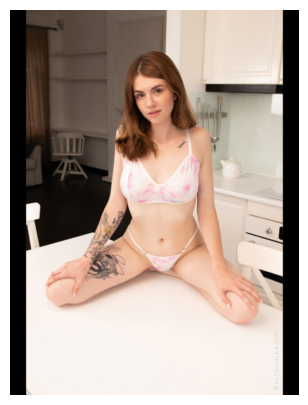

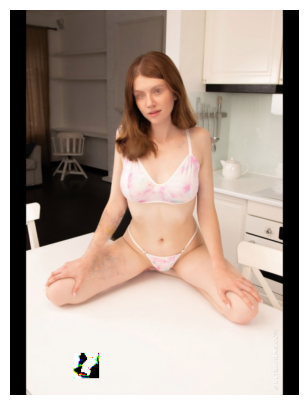

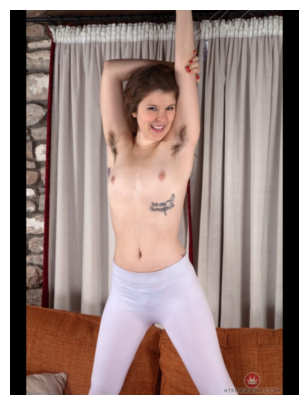

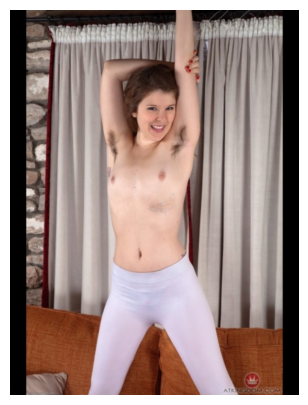

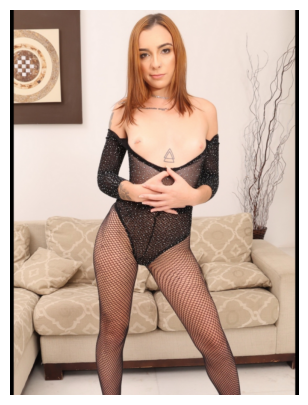

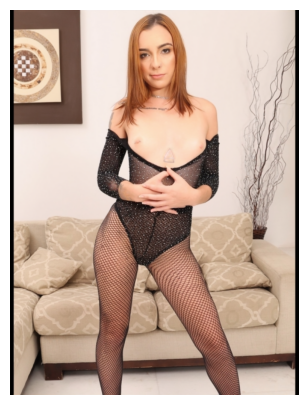

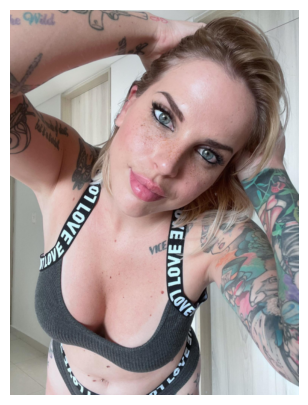

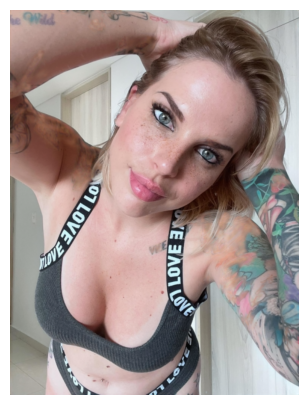

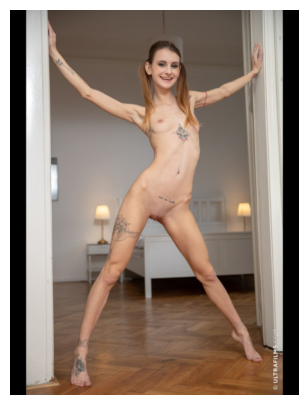

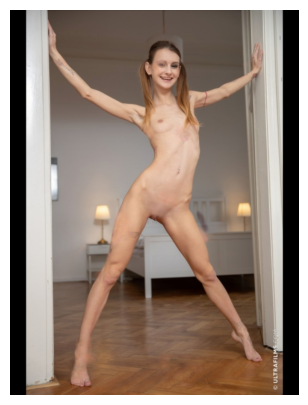

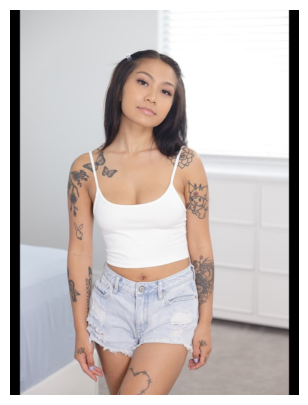

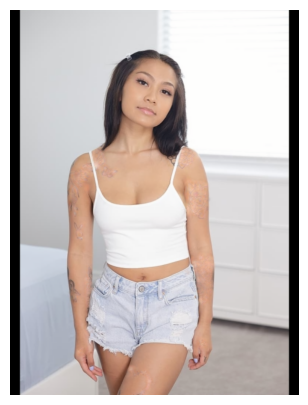

In [7]:
raw_image_files = get_image_files(input_path)

# loop over all the images and process them
for raw_image_file in raw_image_files:
    # load the image and process
    print(f"Processing {raw_image_file}")
    pil_image = PILImage.create(raw_image_file)
    clean_img = predict_image(pil_image)